# Predicción de sismos - ACA 

## Librerias necesarias
Existe una serie de herramientas externas que seran incluidas en el proyecto con el fin de simplificar el proceso de analisis del modelo 

In [ ]:
!apt-get install libgeos
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
print('done')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (189 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up

done


In [ ]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 2.8MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702129 sha256=8feff2e1d2a6d0f5333dca9cd21094cea0bb4565a78dd5c275a6457cee25cc54
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.6.1.post1
    Uninstalling pyproj-2.6.1.post1:
      Successfully uninstalled pyproj-2.6.1.post1


In [ ]:
# Importando librerrias necesarias para la creación de datasets
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

#Se usa de un archivo de Excel que se encuentra en nuestro drive
from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Actualmente el equipo genero el csv. Este se baso en extraer información del SIG de sismos de MARM, realizando una consulta HTTP especificando la extraccción de datos registrados desde 2010 al presente día.

El [SIG](http://mapas.snet.gob.sv/geologia/sismicidad.phtml) útilizado proporciona información publica por lo que ha sido anexado para futura referencia

In [ ]:
#Este notebook depende del archivo csv para realizar todos los procesos
df = pd.read_csv("drive/My Drive/Sismos-el-salvador.csv")
df.head()

,Fecha,Hora local,Latitud N(°),Longitud W(°),Localizacion,Profundidad (km),Magnitud,Intensidad
0,"Jul 10, 2020",5:48:04 AM,13.1088,-89.5718,Frente a la costa de La Libertad. A 44 km al s...,40.18,3.6,II en La Libertad
1,"Jul 05, 2020",2:12:34 PM,13.6310,-90.2507,Frente a la costa de Guatemala. A 26 km al oes...,55.89,3.6,II en AhuachapÃ¡n
2,"Jul 05, 2020",6:52:38 AM,13.2823,-87.7833,En Golfo de Fonseca. A 9 km al sureste de La U...,19.61,2.9,II en La UniÃ³n
3,"Jul 05, 2020",4:02:38 AM,13.2725,-89.7760,Frente a la costa de Sonsonate. A 28 km al sur...,42.07,3.9,II en Sonsonate
4,"Jul 01, 2020",6:35:34 PM,12.5902,-87.9015,Frente a la costa de La UniÃ³n. A 63 km al sur...,50.42,4.1,II en La Union


In [ ]:
#Este bloque de codigo es opcional y se encarga de filtrar el dataset de valores atipicos que se encuentran muy alejados de El Salvador
for idx, row in df.iterrows():
  latitud = row['Latitud N(°)']
  longitud = row['Longitud W(°)']
  if (latitud < 12 or latitud > 14.5) or (longitud < -91 or longitud > -87.5):
    df.drop(idx, inplace=True)

In [ ]:
# Las fechas ingresadas son transformadas a una representación numerica con el objetivo de ser estudiadas de manera cuantitativa
import datetime
import time as tlib
months = [None, "Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov" , "Dic"]
timestamp = []
plusLon = []
profundidadM = []

def twoDigit(field):
  return field if(int(field) > 9 and len(field) > 1) else '0'+str(field)


for date, time in zip(df["Fecha"], df['Hora local']):
    # Date format check
    dateSp = date.split()
    month = months.index(dateSp[0])
    monthStrFormat = twoDigit(str(month))
    day = str(dateSp[1]).replace(',','')
    year = dateSp[2]
    formatDate = year+'-'+monthStrFormat+'-'+day

    # Time format check
    timeSp = time.split(":")
    hour = twoDigit(timeSp[0])
    timeFormat = hour +':'+ timeSp[1] +':'+ timeSp[2]
    ts = datetime.datetime.strptime(formatDate+' '+timeFormat, '%Y-%m-%d %I:%M:%S %p')
    timestamp.append(tlib.mktime(ts.timetuple()))
    
   
print(timestamp) 

[1594360084.0, 1593958354.0, 1593931958.0, 1593921758.0, 1593628534.0, 1593506709.0, 1593402844.0, 1592816385.0, 1592738476.0, 1592389646.0, 1592360197.0, 1592317020.0, 1592306305.0, 1592114592.0, 1591960622.0, 1591875087.0, 1591855808.0, 1591592057.0, 1591587464.0, 1591252604.0, 1591131409.0, 1591078095.0, 1591052155.0, 1590951632.0, 1590771638.0, 1590705802.0, 1590583500.0, 1590410995.0, 1590403354.0, 1590235766.0, 1590145672.0, 1590143901.0, 1590061397.0, 1590051976.0, 1589948980.0, 1589863793.0, 1589600445.0, 1589447137.0, 1589367271.0, 1589287827.0, 1589247155.0, 1589244888.0, 1588940199.0, 1588925281.0, 1588451971.0, 1588428593.0, 1588265580.0, 1588244263.0, 1588090954.0, 1588086614.0, 1588051431.0, 1588026383.0, 1587910603.0, 1587879300.0, 1587793880.0, 1587716205.0, 1587715537.0, 1587715280.0, 1587274306.0, 1587262710.0, 1587234927.0, 1586885893.0, 1586846278.0, 1586546354.0, 1586472429.0, 1586394154.0, 1586144642.0, 1585923602.0, 1585777792.0, 1585774028.0, 1585607296.0, 15855

In [ ]:
#Agrega las columnas especiales adicionales
timeStamp = pd.Series(timestamp)
df['Timestamp'] = timeStamp.values
df.head()

#Elimina columnas innecesarias para los modelos
final_data = df.drop(['Fecha', 'Hora local'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']


final_data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Latitud N(°),Longitud W(°),Localizacion,Profundidad (km),Magnitud,Intensidad,Timestamp
0,13.1088,-89.5718,Frente a la costa de La Libertad. A 44 km al s...,40.18,3.6,II en La Libertad,1.594360e+09
1,13.6310,-90.2507,Frente a la costa de Guatemala. A 26 km al oes...,55.89,3.6,II en AhuachapÃ¡n,1.593958e+09
2,13.2823,-87.7833,En Golfo de Fonseca. A 9 km al sureste de La U...,19.61,2.9,II en La UniÃ³n,1.593932e+09
3,13.2725,-89.7760,Frente a la costa de Sonsonate. A 28 km al sur...,42.07,3.9,II en Sonsonate,1.593922e+09
4,12.5902,-87.9015,Frente a la costa de La UniÃ³n. A 63 km al sur...,50.42,4.1,II en La Union,1.593629e+09


In [ ]:
final_data = final_data.drop(['Localizacion', 'Intensidad'], axis=1)
final_data.head()

,Latitud N(°),Longitud W(°),Profundidad (km),Magnitud,Timestamp
0,13.1088,-89.5718,40.18,3.6,1.594360e+09
1,13.6310,-90.2507,55.89,3.6,1.593958e+09
2,13.2823,-87.7833,19.61,2.9,1.593932e+09
3,13.2725,-89.7760,42.07,3.9,1.593922e+09
4,12.5902,-87.9015,50.42,4.1,1.593629e+09


In [ ]:
#Prepara los datos para el mapa
m = Basemap(projection='mill',llcrnrlat=10, llcrnrlon=-97,urcrnrlon=-83, urcrnrlat=17, resolution='l' )
longitudes = final_data["Longitud W(°)"].tolist()
latitudes = final_data["Latitud N(°)"].tolist()

x,y = m(longitudes,latitudes)

## Mapa de actividad sísmica
Usando los datos extraídos del mapa se han marcado con puntos azules los terremotos registrados en El Salvador. Observando el mapa es posible notar visualmente que existen zonas con gran frecuencia sísmica. Con esta información visual se conjetura que existe un patrón, casi todos los terremotos registrados se forman atravesando el país y las costas.

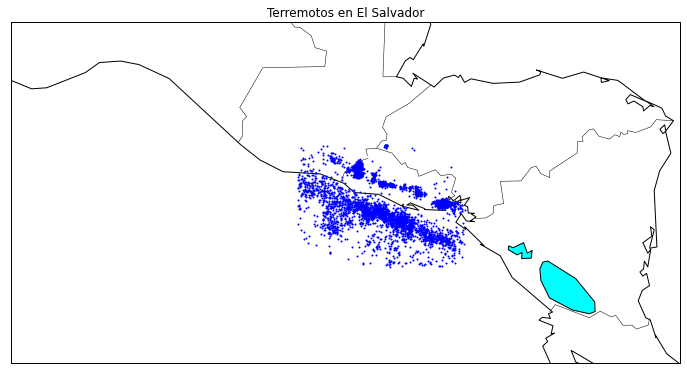

In [ ]:
#Crea un mapa digital del pais y le inserta datos
fig = plt.figure(figsize=(12,10))
plt.title("Terremotos en El Salvador")
m.plot(x, y, "o", markersize = 1, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='white',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

## Modelo de predicción de latitud y longuitud
Utilizando los registros proporcionados por MARN nos enfocamos en analizar un análisis para un modelo. El objetivo es determinar si a través de una fecha, magnitud y profundidad es posible encontrar un patrón o relación con las coordenadas del terremoto.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x = final_data[['Timestamp','Magnitud','Profundidad (km)']]
y = final_data[['Latitud N(°)', 'Longitud W(°)']]


# Sacar las variables dividiendolos datos
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, test_size=0.20, random_state=20)
max_depth = 100

print(x_train.shape, x_test.shape, y_train.shape, x_test.shape)

(3557, 3) (890, 3) (3557, 2) (890, 3)


### RandomForestRegressor

In [ ]:
#Se crear una regresión usando el algoritmo de random forest regressor
from sklearn.ensemble import RandomForestRegressor

regr_rf = RandomForestRegressor(n_estimators=70, max_depth=max_depth,random_state=1, min_samples_split = 2, min_samples_leaf = 1)

regr_rf.fit(x_train, y_train)
y_ranfo = regr_rf.predict(x_test)

In [ ]:
r2_score(y_test, y_ranfo)

0.39526389961464803

In [ ]:
from sklearn.model_selection import GridSearchCV

n_estimators = [40, 80, 120, 140, 160]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(regr_rf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train)


Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 10.4min finished


In [ ]:
y_grid = bestF.predict(x_test)
print(r2_score(y_test, y_grid, multioutput='variance_weighted'))


0.3604305565816329


### MultiOutputRegressor

In [ ]:
from sklearn.multioutput import MultiOutputRegressor

regr_multirf = MultiOutputRegressor(regr_rf)
regr_multirf.fit(x_train, y_train)
y_multirf = regr_multirf.predict(x_test)

In [ ]:
r2_score(y_test, y_multirf, multioutput='variance_weighted')

0.32880988227545654

### KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

k_neighbor = KNeighborsRegressor(n_neighbors=70, weights='distance',leaf_size=50 )
k_neighbor.fit(x_train, y_train)
y_pred = k_neighbor.predict(x_test)

In [ ]:
r2_score(y_test, y_pred, multioutput='variance_weighted')

0.22571636998594152

### Guardar modelo

In [ ]:
import joblib

filename = 'LatitudLonguitudF.sav'
best_fit = gridF

joblib.dump(best_fit, filename)  


['LatitudLonguitudF.sav']

In [ ]:
loaded_model = joblib.load(filename)
y_loadp = loaded_model.predict(x_test)
print(y_loadp)

[[13.6778302  10.74899852]
 [13.81422    10.30408378]
 [13.35393     9.6741853 ]
 ...
 [13.28099    12.11494   ]
 [13.71460889 10.73702533]
 [13.91542    10.33979   ]]


In [ ]:
loaded_model.predict([[12321,70,121]])

array([[  4.662, 114.515]])

## Modelo de predicción de magnitud y profundidad

Así como el primer modelo se hace uso de los registros de MARN, pero con un enfoque distinto. El objetivo de este modelo es determinar si a través de una fecha y coordenadas es posible encontrar un comportamiento de dependencia para la profundidad y magnitud de un terremoto.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x = final_data[['Timestamp','Latitud N(°)','Longitud W(°)']]
y = final_data[['Magnitud', 'Profundidad (km)']]


# Sacar las variables dividiendolos datos
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, test_size=0.20, random_state=0)
max_depth = 30

print(x_train.shape, x_test.shape, y_train.shape, x_test.shape)

(3557, 3) (890, 3) (3557, 2) (890, 3)


### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr_rf = RandomForestRegressor(random_state=8, max_depth=max_depth)
regr_rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=8, verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 20, 50, 70, 120]}

grid_obj = GridSearchCV(regr_rf, parameters)
grid_fit = grid_obj.fit(x_train, y_train)
best_fit = grid_fit.best_estimator_
y_ranfo = best_fit.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

In [ ]:
r2_score(y_test, y_ranfo, multioutput='variance_weighted')

0.6499809702474774

### MultiOutputRegressor

In [ ]:
from sklearn.multioutput import MultiOutputRegressor

regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=70,max_depth=max_depth,random_state=0))
regr_multirf.fit(x_train, y_train)
y_multirf = regr_multirf.predict(x_test)

In [ ]:
r2_score(y_test, y_multirf, multioutput='variance_weighted')

0.6435054460145282

### KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression

x, y = make_regression(n_samples=70, n_features=10, n_informative=5, n_targets=2, random_state=1)
k_neighbor = KNeighborsRegressor()
k_neighbor.fit(x_train, y_train)
y_pred = k_neighbor.predict(x_test)

In [ ]:
r2_score(y_test, y_pred, multioutput='variance_weighted')

0.08958213958270446

### Guardar modelo

In [ ]:
import joblib
from sklearn.metrics import r2_score

def best_model(M1, M2, M3):
  score_1 = r2_score(y_test, y_ranfo, multioutput='variance_weighted')
  score_2 = r2_score(y_test, y_multirf, multioutput='variance_weighted')
  score_3 = r2_score(y_test, y_pred, multioutput='variance_weighted')
  if (score_1 >= score_2) and (score_1 >= score_3): 
      return M1
  
  elif (score_2 >= score_1) and (score_2 >= score_3): 
      return M2
  else: 
      return M3

filename = 'LatitudLonguitud.sav'
best_fit = best_model(regr_rf, regr_multirf, k_neighbor)

joblib.dump(best_fit, filename)  


['LatitudLonguitud.sav']

In [ ]:
loaded_model = joblib.load(filename)
y_loadp = loaded_model.predict(x_test)
print(y_loadp)

[[13.6778302  10.74899852]
 [13.81422    10.30408378]
 [13.35393     9.6741853 ]
 ...
 [13.28099    12.11494   ]
 [13.71460889 10.73702533]
 [13.91542    10.33979   ]]


In [ ]:
loaded_model.predict([[12321,70,121]])

array([[  4.662, 114.515]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x = final_data[['Magnitud','Profundidad (km)','Latitud N(°)', 'Longitud W(°)']]
y = final_data[['Timestamp']]

# Sacar las variables dividiendolos datos
x_train, x_test, y_train, y_test = train_test_split(x, y.values.ravel(), train_size=0.80, test_size=0.20, random_state=4)

print(x_train.shape, x_test.shape, y_train.shape, x_test.shape)

(3557, 4) (890, 4) (3557,) (890, 4)


In [ ]:
import statsmodels.api as sm 
model = sm.OLS(y_train, x_train).fit() 
y_pred = model.predict(x_test)


print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mean absolute error: 128585053.35
Residual sum of squares (MSE): 23881622706602896.00
R2-score: -17.03
